<div class="alert alert-success">
    
## Практическое домашнее задание 2:

  Линейная регрессия, scikit-learn

### Общая информация


Мягкий дедлайн и Жесткий дедлайн см. на странице в `notion`

**Материалы**

- [Документация](http://docs.scipy.org/doc/) по библиотекам NumPy и SciPy
- [Документация](http://matplotlib.org/) по библиотеке Matplotlib
- [Документация](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по библиотеке Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Документация](http://stanford.edu/~mwaskom/software/seaborn/) по библиотеке Seaborn

Библиотека **Sklearn:**

sklearn.liner_model

linear_model:

- RidgeClassifier
- SGDClassifier
- SGDRegressor
- LinearRegression
- LogisticRegression
- Lasso
и т.д.

Документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

### О задании
В этом задании нужно будет проанализировать данные и выделить из них полезные признаки. Кроме того, мы рассмотрим различные аспекты построения линейной модели

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Стоит обратить внимание**, что в каждом подразделе этого домашнего задания присутствуют не только задачи, но и вопросы. Вопросы расширяют задачи и ориентированы на интерпретируемость и обоснование вашего кода. Поэтому отвечать на них является обязательным условием. За отсутствие выводов и ответов на вопросы баллы могут быть снижены. Ну и в другом случае, если Вы, напротив, ответите на вопросы, но не напишете корректный код к соответствующим задачам, то баллы за такое выставляться не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы.

### Формат сдачи
Присылать необходимо ноутбук с выполненным заданием в гугл форму, ссылка на которую будет выложена в ноушне. Сам ноутбук называйте в формате hw-sirius-02-linregr-Username.ipynb, где Username — ваша фамилия.  

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

#   Линейная регрессия. Часть 1. (5 баллов)

### Подготовка данных (2 балла + включая ответы на вопросы)

**Задание 1.1**. В данном разделе будем выделять признаки из такого датасета: [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview).
Цель: предсказать длительность поездки на такси.
Следует скачать обучающую выборку из этого соревнования и загрузить ее:

In [105]:
# ваш код здесь
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("train.csv")
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Важно: в данных имеются стоблцы `pickup_datetime` и `dropoff_datetime`. Колонку `dropoff_datetime` следует удалить, поскольку она была добавлена организаторами соревнования на `kaggle` только в обучающую выборку и ее, соотвественно, нельзя использовать.

В колоноке `pickup_datetime` записаны дата и время начала поездки. Работа с таким типом данных стандартизирована из-за распространенности соответствующих признаков во многих датасетах (хотя подводные камни все же остаются).
В данном случае существует подход - нужно преобразовать данные в `datetime`-объекты.

In [106]:
# ваш код здесь
data.drop(columns=['dropoff_datetime'], inplace=True)
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Следует посмотреть на распределение таргета в обучающей выборке, например, нарисовать гистограмму этой колонки (используйте `plt.yscale('log')`).

И, после этого **ответьте на вопрос**: "Что можете сказать о целевой переменной по гистограмме её значений?:

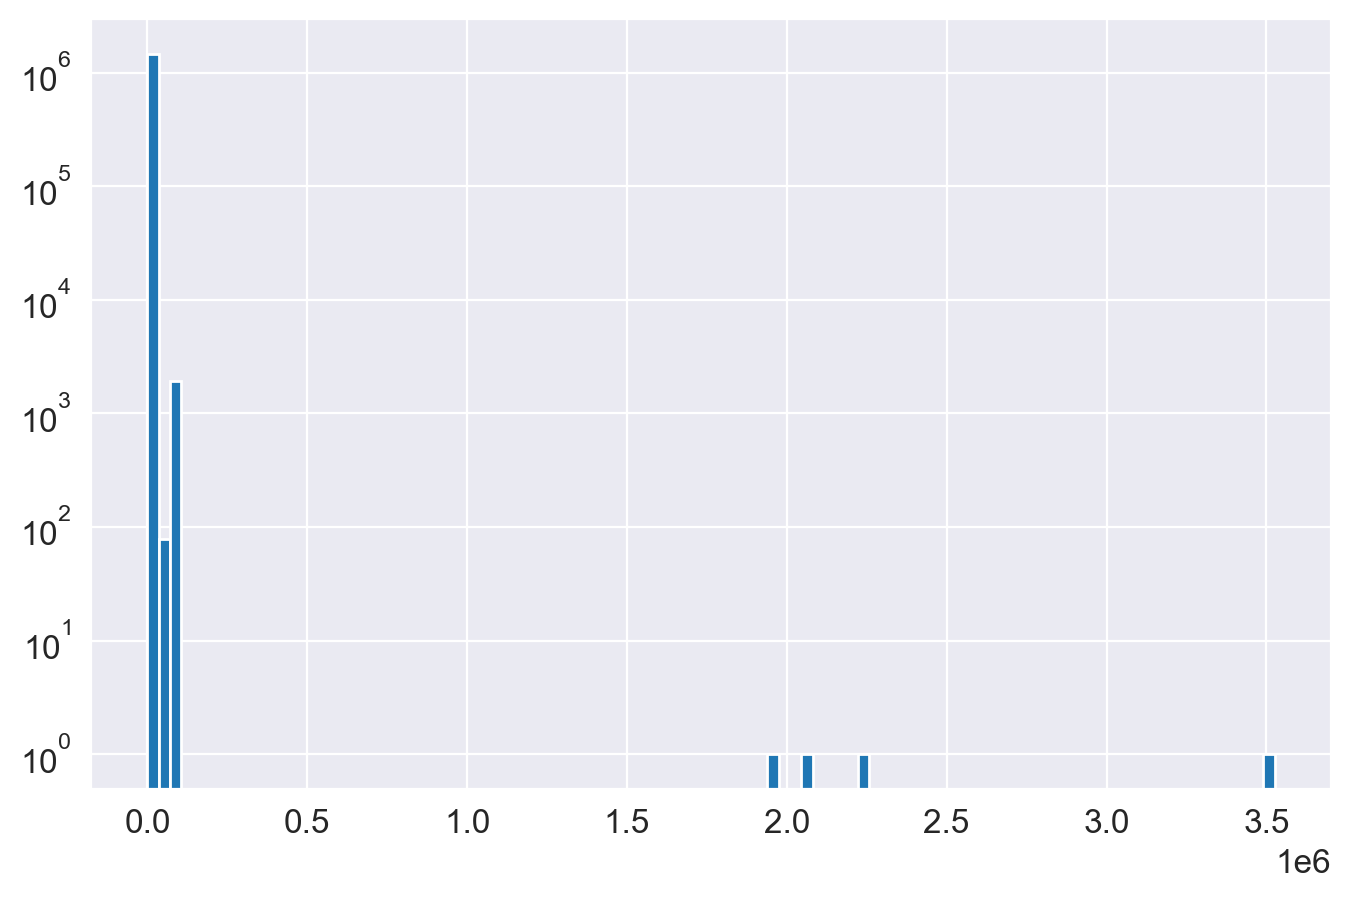

In [107]:
# ваш код  и ответ здесь
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')


plt.yscale('log')
plt.hist(data['trip_duration'], bins=100)
plt.show()

**Ответ**

В данной выборке есть выбросы, которые сильно влияют на отображаемую диаграмму. В процессе обучения, если мы не собираемся переобучать модель, они не сыграют важной роли. Поэтому, мы перестраиваем гистограмму чтобы просто показать без них.

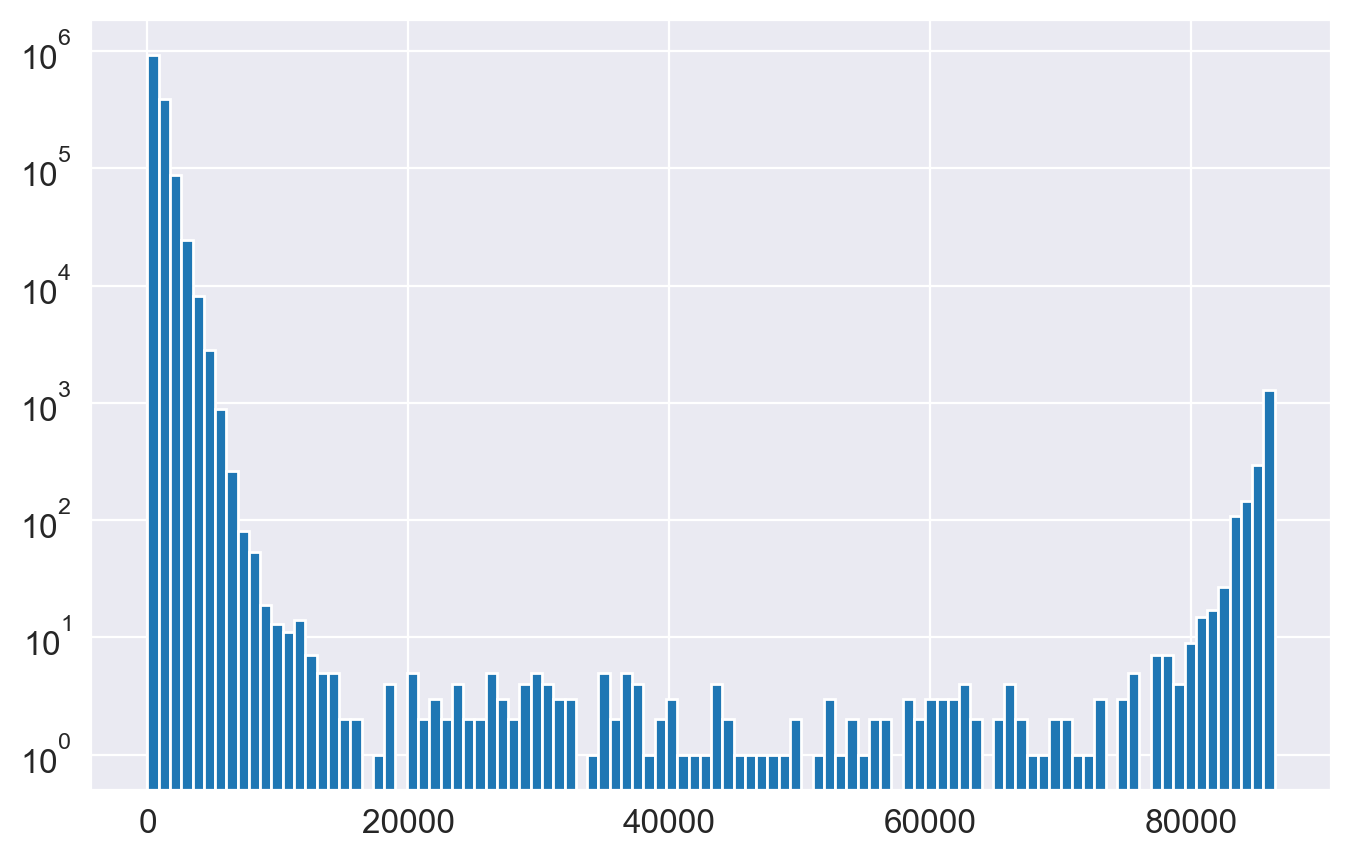

In [108]:
withoutBigTripDuration = data["trip_duration"].copy()
withoutBigTripDuration = withoutBigTripDuration[withoutBigTripDuration < 1000000]
plt.yscale('log')
plt.hist(withoutBigTripDuration, bins=100)
plt.show()

При решении данной задачи в качестве метрики качества использовалась RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему была выбрана в качестве метрики именно RMSLE, а не RMSE? (посмотрите внимательно на формулу и подумайте, почему она в данном конкретном случае, действительно будет являться подходящей метрикой)

**Ответ**

Нам более интересны относительные значения, а не абсолютные. И используемая здесь метрика мягче относится к таким случаям.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, а точнее сказать модификации линейной регресии,и каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ



![Dok-vo.png](Dok-vo.png)

В итоге, наша рассматриваемая задача оптимизации RMSLE была сведена к задаче оптимизации MSE, которую мы вполне умеем решать. Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

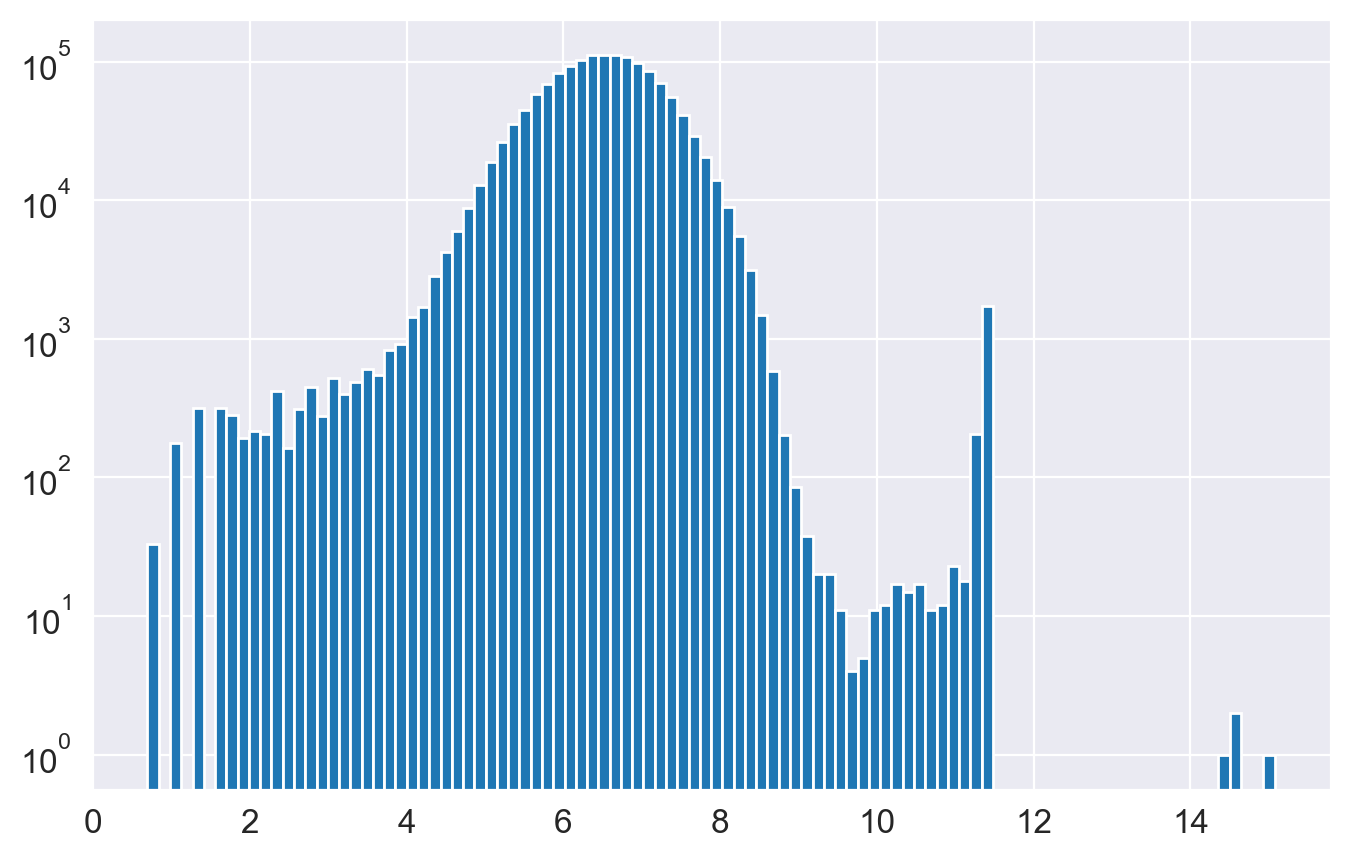

In [109]:
# ваш код здесь
data['log_trip_duration'] = np.log1p(data['trip_duration'])
plt.yscale('log')
plt.hist(data['log_trip_duration'], bins=100)
plt.show()

In [110]:
data = data.drop(['trip_duration'], axis=1)

In [111]:
data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642


Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при  константном предсказании:

In [112]:
# ваш код здесь
from sklearn.metrics import root_mean_squared_error

constant_pred_value = 100

y_actual = data['log_trip_duration'].values
y_pred = np.ones_like(y_actual) * np.log1p(constant_pred_value)

print("RMSE = %.4f" % root_mean_squared_error(y_actual, y_pred))

RMSE = 2.0156


## Выделение признаков, визуализация и работа с `pickup_datetime` (3 балла)

                        

**Задание 1.2 (0.5 баллов)**. Первое с чего стоит начать и кажется самым логичным --- это посмотреть, сколько всего было поездок в каждый из дней. Для этого Вам следует построить график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

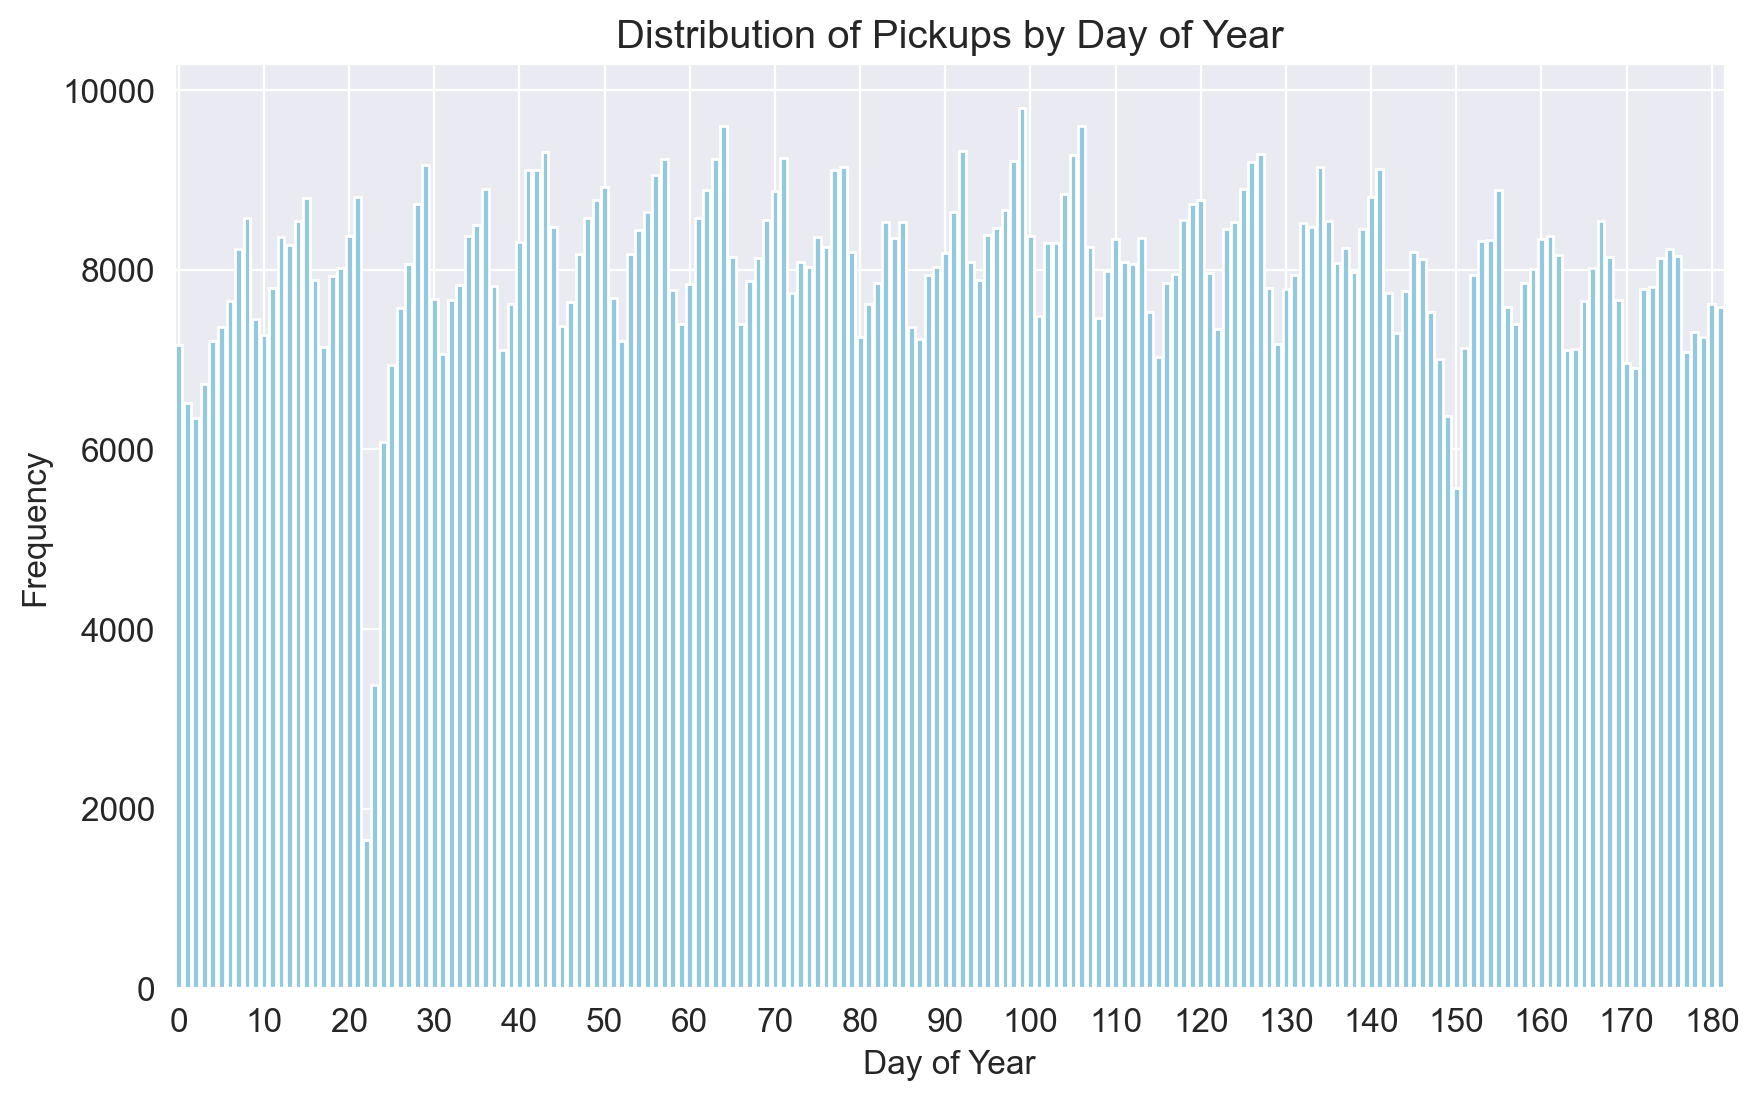

In [113]:
# Добавляем столбец с номером дня в году
data['day_of_year'] = data['pickup_datetime'].dt.dayofyear

# Строим гистограмму с помощью sns.countplot()
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='day_of_year', color='skyblue')

# Устанавливаем метки оси X для каждых N дней
N = 10
labels = ax.get_xticks()
ax.set_xticks(labels[::N])
ax.set_xticklabels(labels[::N])

plt.title('Distribution of Pickups by Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [114]:
frequency = data['day_of_year'].value_counts()
frequency.nsmallest(5).index

Index([23, 24, 151, 25, 3], dtype='int32', name='day_of_year')

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

---

**Ответ**

Аномально маленькое количество поездок:
1. 23 день - 23 января - снежная буря, влласти США запретили использование транспорта (https://ria.ru/20160123/1364032228.html)
2. 151 день - 30 мая - День повиновения в США. Могли быть перекрыты дороги 

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [145]:
data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_year,day_of_week,hour_of_day,month
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,74,0,17,3
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,164,6,0,6
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,19,1,11,1
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,97,2,19,4
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,86,5,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011,99,4,13,4
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161,10,6,7,1
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876,113,4,6,4
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256,5,1,15,1


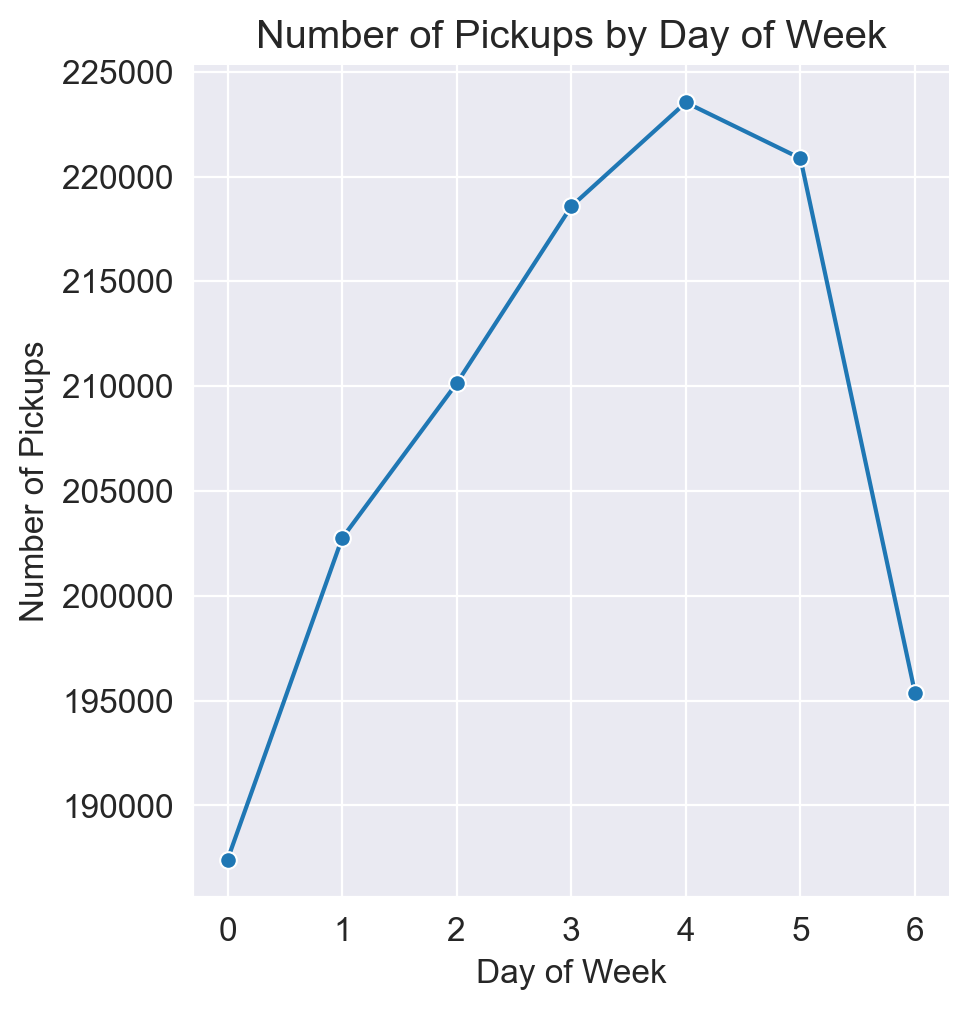

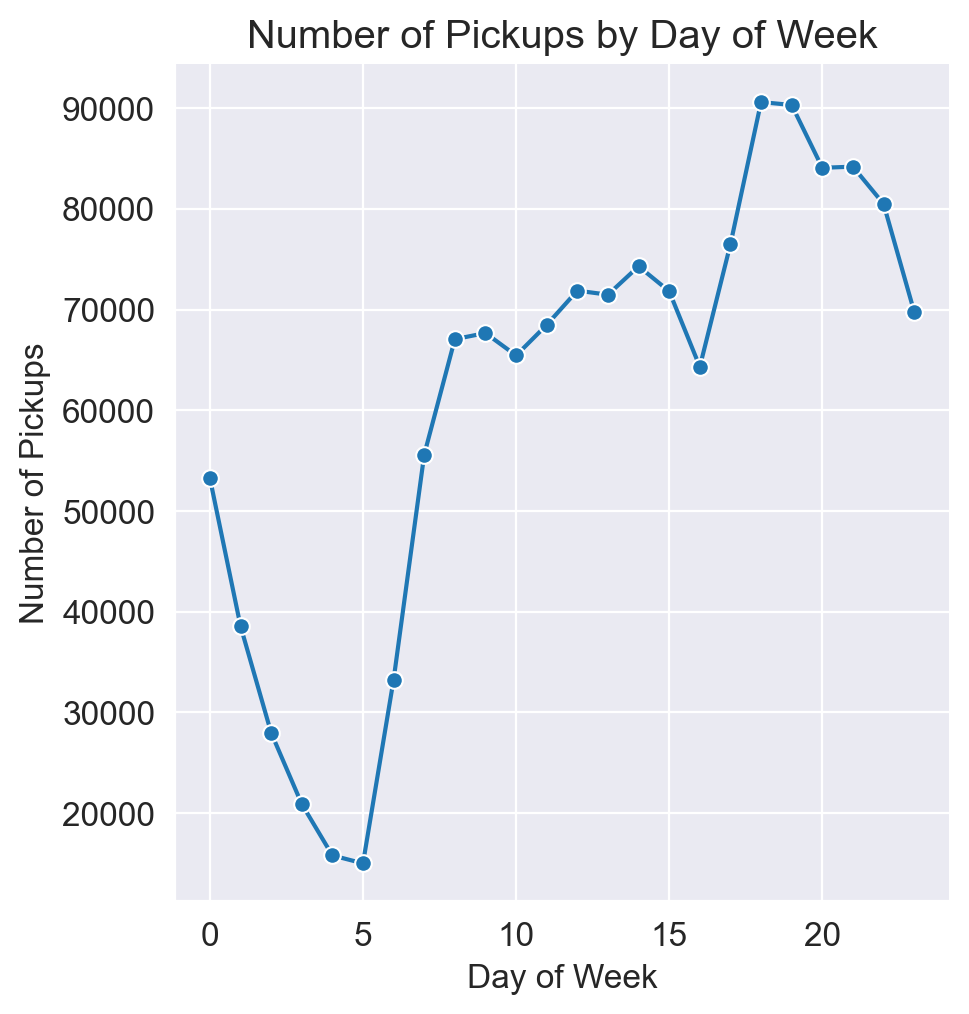

In [160]:
# Добавляем столбцы с днем недели и часом
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['hour_of_day'] = data['pickup_datetime'].dt.hour

# График зависимости количества поездок от дня недели
day_of_week = data.groupby('day_of_week').size().reset_index(name='count')
sns.relplot(data=day_of_week, x='day_of_week', y='count', kind='line', marker='o')
plt.title('Number of Pickups by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.show()
# График зависимости количества поездок от дня недели
day_of_week = data.groupby('hour_of_day').size().reset_index(name='count')
sns.relplot(data=day_of_week, x='hour_of_day', y='count', kind='line', marker='o')
plt.title('Number of Pickups by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.show()

**Задание 1.3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [69]:
# ваш код здесь

C:\Users\vikma\AppData\Local\Temp\ipykernel_24636\378144624.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_trips = data.groupby(['day_of_week', 'hour_of_day']).size().reset_index(name='trips')


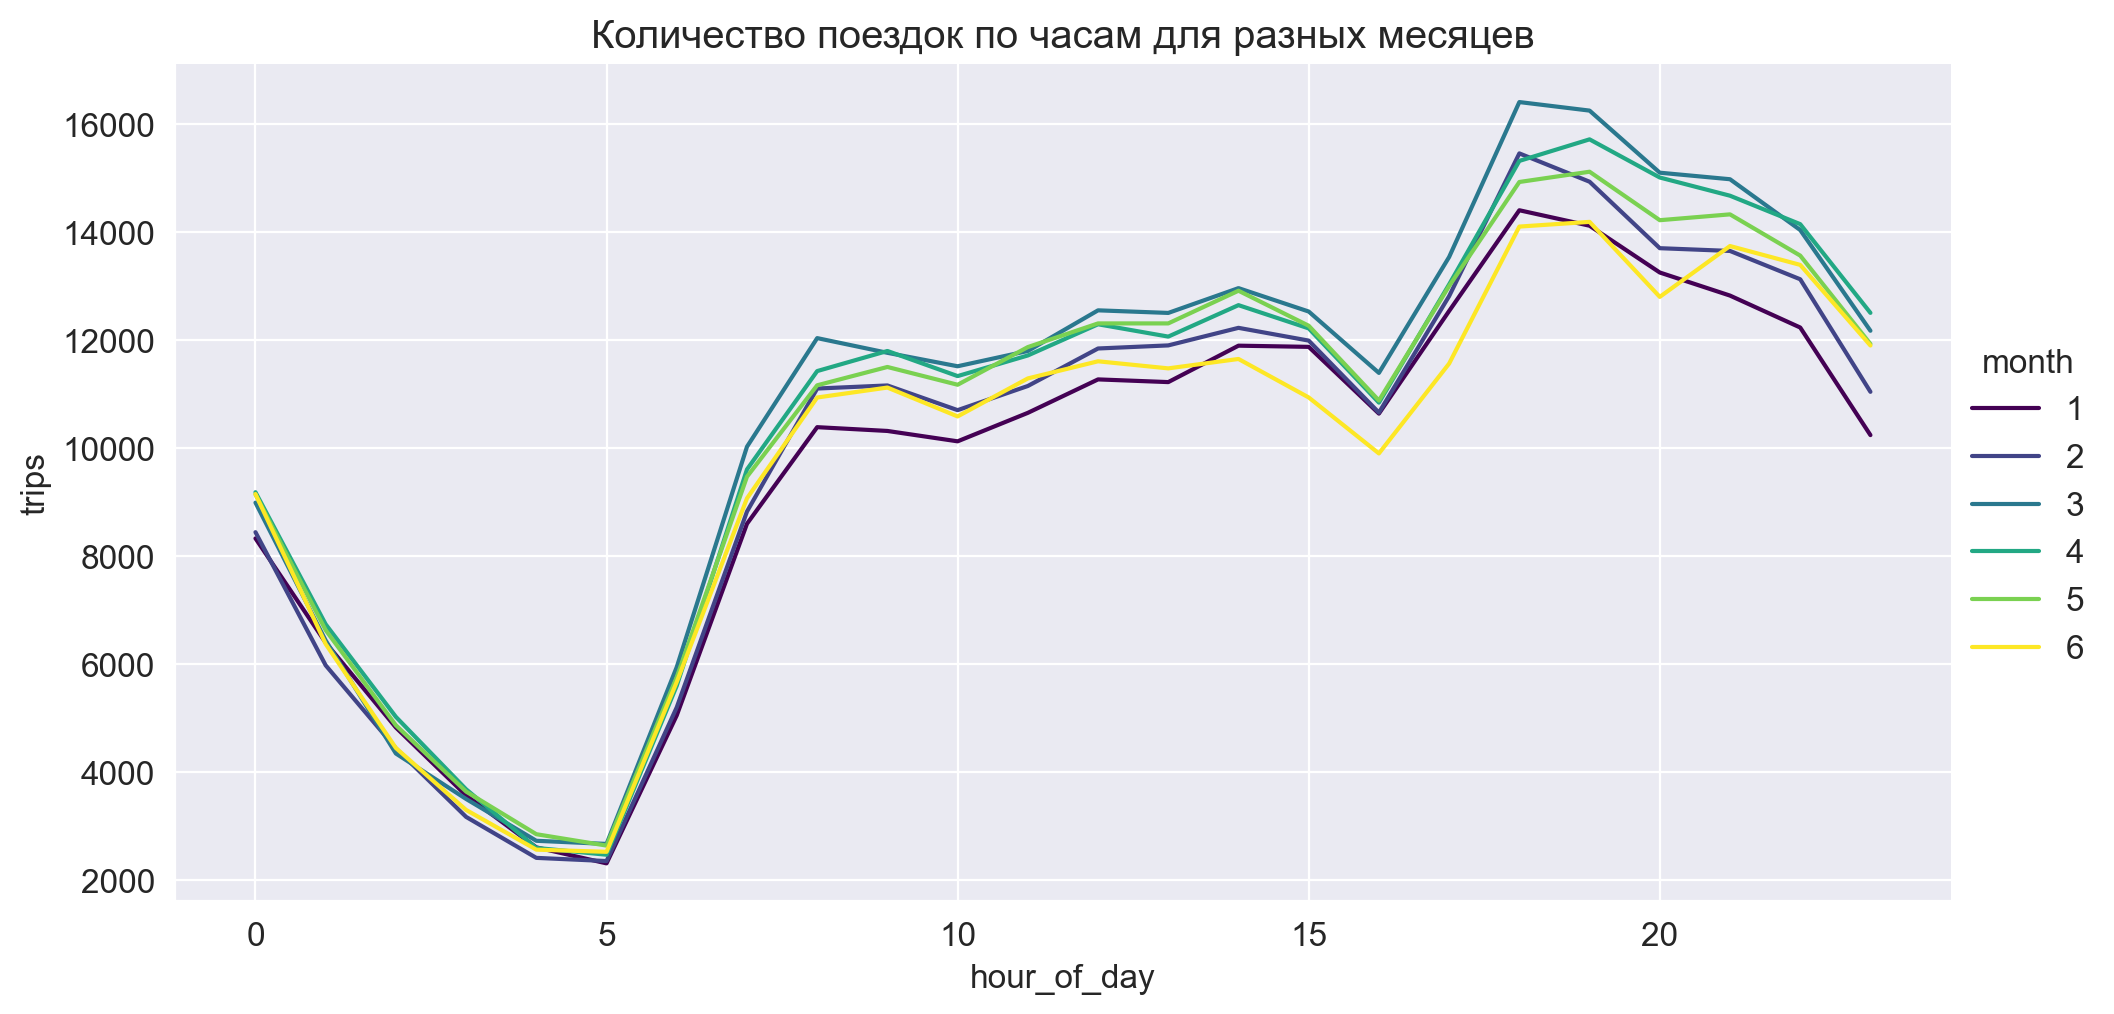

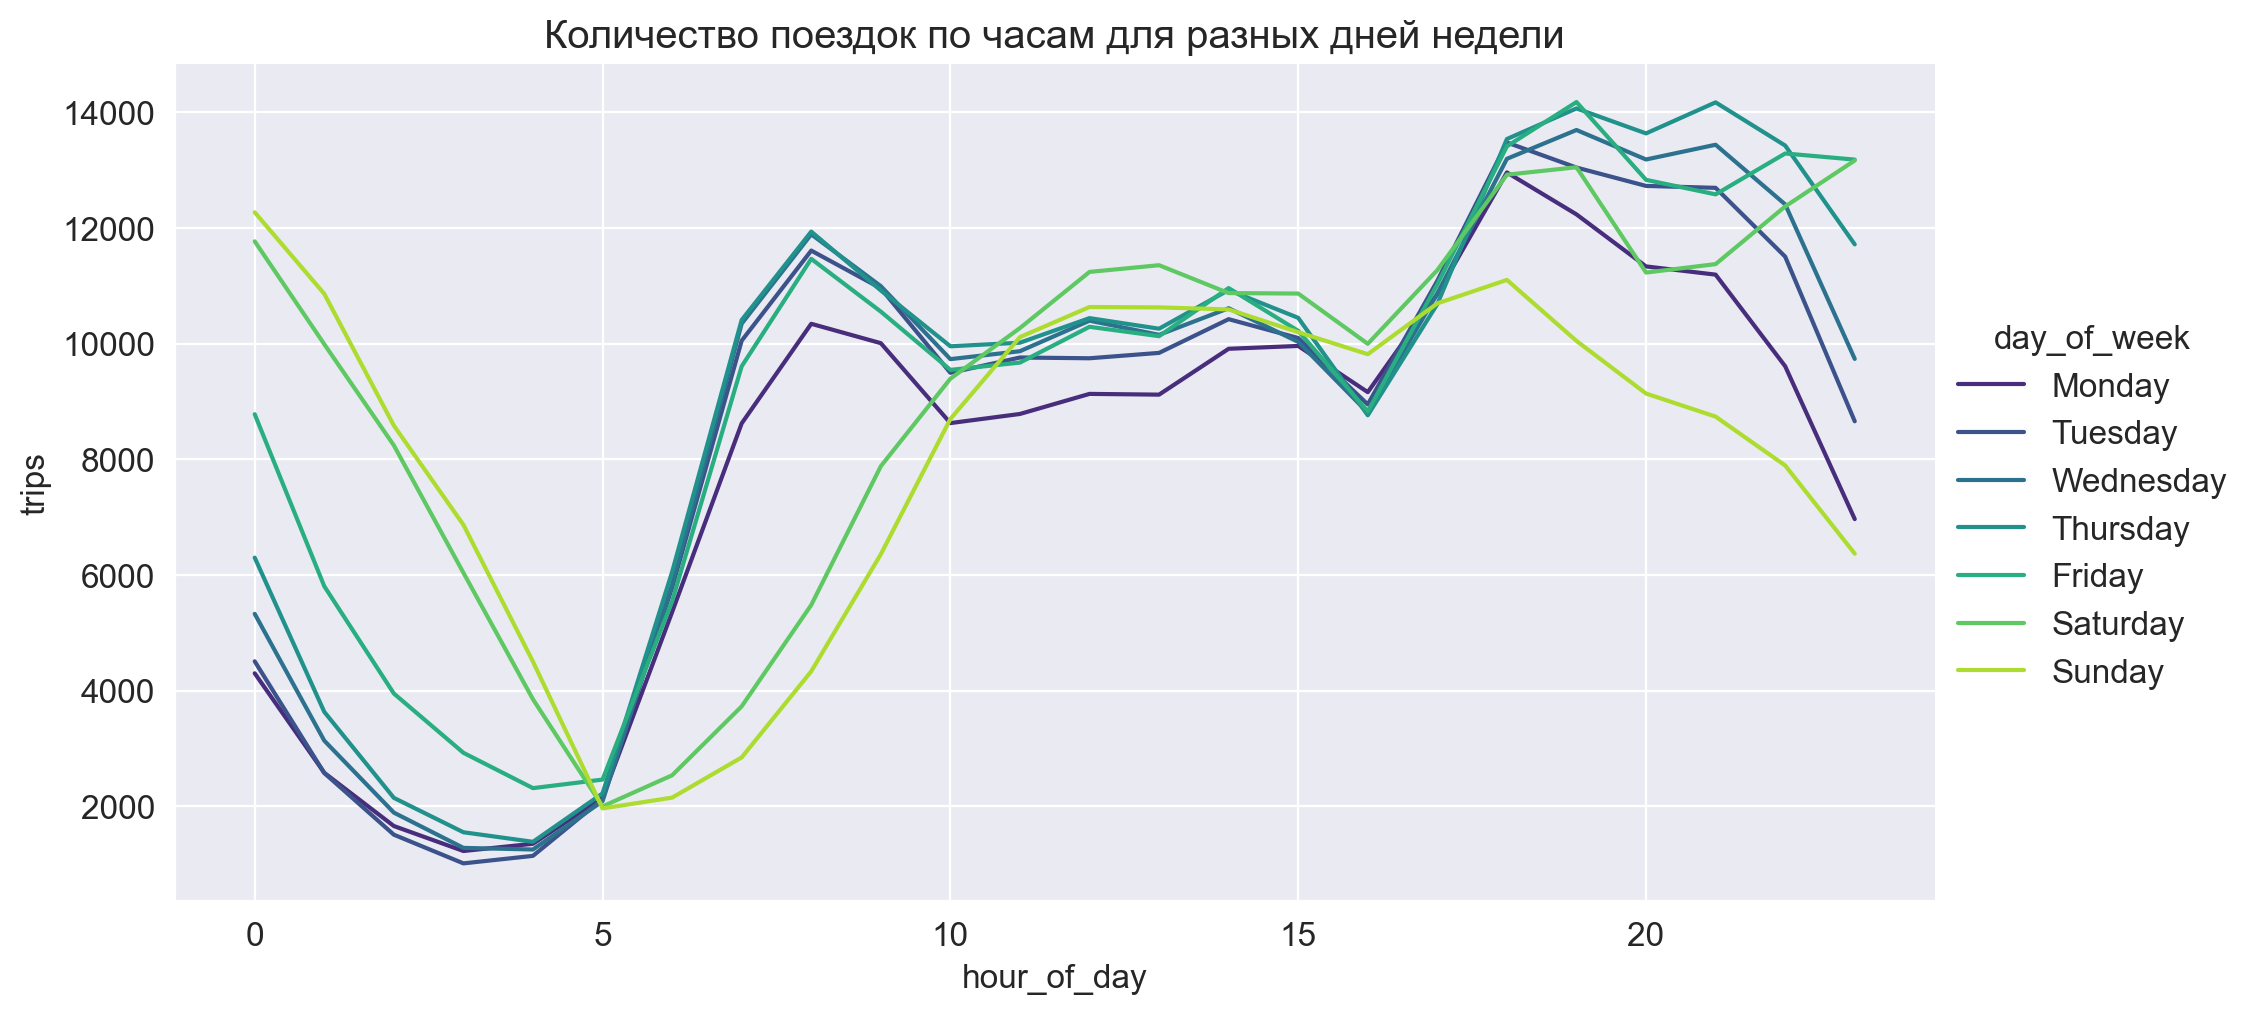

In [135]:
# Добавляем столбцы с днем недели и часом
data['month'] = data['pickup_datetime'].dt.month

# Извлечение и упорядочивание дня недели
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data['day_of_week'] = pd.Categorical(data['pickup_datetime'].dt.day_name(), categories=days, ordered=True)

# Подсчет количества поездок
monthly_trips = data.groupby(['month', 'hour_of_day']).size().reset_index(name='trips')

weekly_trips = data.groupby(['day_of_week', 'hour_of_day']).size().reset_index(name='trips')

# График по месяцам
sns.relplot(data=monthly_trips, x='hour_of_day', y='trips', kind='line', hue='month', palette='viridis', aspect=2)
plt.title('Количество поездок по часам для разных месяцев')
plt.show()

# График по дням недели
sns.relplot(data=weekly_trips, x='hour_of_day', y='trips', kind='line', hue='day_of_week', palette='viridis', aspect=2)
plt.title('Количество поездок по часам для разных дней недели')
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 1.4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [ ]:
# ваш код здесь

**Вопрос (0.5 баллов)**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

In [ ]:
# ваш ответ здесь

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [ ]:
# ваш код здесь

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

In [ ]:
# ваш ответ здесь

**Задание 1.5 (1 балл)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [ ]:
# ваш код здесь

## Линейная регрессия. Часть 2. (5 баллов)

Далее мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'data/diamonds.csv'

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 2.1 (0.1 баллов)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [ ]:
# ваш код здесь

**Задача 2.2 (0.1 баллов)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
# ваш код здесь

**Задача 2.3 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
# ваш код здесь

**Задача 2.4 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
# ваш код здесь

**Задача 2.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

**Задача 2.6 (0.4 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

**Задача 2.7 (0.3 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

**Задача 2.8 (0.3 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

**Задача 2.9 (0.5 баллов)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

**Задача 2.10 (0.7 баллов)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

**Задача 2.11 (0.8 баллов)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

**Задача 2.12 (0.6 баллов)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

**Задача 2.13 (0.7 баллов)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

## Творческий Бонус (0.05 балл)

Учиться - это, конечно, хорошо, но важно не забывать отдыхать, посвящать время себе и близким. Выберете рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека этим блюдом. Кратко опишите ваши впечатления, прикрепите рецепт, фотографии блюда и довольного гостя.

`### ваш кулинарный опыт здесь ###`

## Оценка работы (посчитайте ваши набранные баллы)

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ